M2021ANLT021

MACHINE LEARNING MINI PROJECT

Census Income Dataset: https://archive.ics.uci.edu/ml/datasets/census+income 

Submitted to:
Dr. Kamal Murari
School of Habitat Studies
Tata Institute of Social Sciences


In [36]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df32K = pd.read_excel(r"C:\Users\prakh\OneDrive\Desktop\ML class\adult.xlsx")
df32K.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', '50K']

In [3]:
df32K.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       '50K'],
      dtype='object')

In [4]:
df16K = pd.read_excel(r"C:\Users\prakh\OneDrive\Desktop\ML class\adult_test.xlsx")
df16K.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                 'native_country', '50K']

In [5]:
df16K = df16K.reset_index()


In [6]:
df48K = df32K.append(df16K, ignore_index=True, sort=False) 

C:\Users\prakh\AppData\Local\Temp\ipykernel_11376\1841337463.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df48K = df32K.append(df16K, ignore_index=True, sort=False)


In [7]:
df48K.native_country.value_counts()/len(df48K)

 United-States                 0.897424
 Mexico                        0.019471
 ?                             0.017546
 Philippines                   0.006040
 Germany                       0.004218
 Puerto-Rico                   0.003767
 Canada                        0.003726
 El-Salvador                   0.003173
 India                         0.003092
 Cuba                          0.002825
 England                       0.002600
 China                         0.002498
 South                         0.002355
 Jamaica                       0.002170
 Italy                         0.002150
 Dominican-Republic            0.002109
 Japan                         0.001884
 Guatemala                     0.001802
 Poland                        0.001781
 Vietnam                       0.001761
 Columbia                      0.001740
 Haiti                         0.001536
 Portugal                      0.001372
 Taiwan                        0.001331
 Iran                          0.001208


In [8]:
# As you can see United States count for almost 90% of the native_country data, and won't help that much with our analysis, for which I will drop this column.
# Droping  'fnlwgt' which is an US State weigh and 'education_num' which is the duplicate of 'education'. 
df48K = df48K.drop(['native_country', 'fnlwgt', 'education_num'], axis=1) 

In [9]:
# Data cleaning and Simplification
df48K['marital_status'] = df48K['marital_status'].replace({'Never-married','Divorced', 'Separated', 'Widowed'}, 'Single', regex=True)
df48K['marital_status'] = df48K['marital_status'].replace({'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'}, 'Married', regex=True)
                                                          
df48K['education'] = df48K['education'].replace({'Preschool','1st-4th','5th-6th', '7th-8th'}, 'Elementary-School', regex=True)
df48K['education'] = df48K['education'].replace({'9th','10th', '11th', '12th', 'HS-grad'}, 'High-School', regex=True)
df48K['education'] = df48K['education'].replace({'Masters', 'Doctorate'}, 'Advanced-Studies', regex=True)
df48K['education'] = df48K['education'].replace({'Bachelors', 'Some-college'}, 'College', regex=True)
df48K['education'] = df48K['education'].replace({'Prof-school', 'Assoc-acdm', 'Assoc-voc'}, 'Professional-School', regex=True)

df48K['workclass'] = df48K['workclass'].replace({'Self-emp-inc', 'Self-emp-not-inc'}, 'SelfEmployed', regex=True)
df48K['workclass'] = df48K['workclass'].replace({'Local-gov', 'State-gov', 'Federal-gov'}, 'Gov-job', regex=True)
df48K['workclass'] = df48K['workclass'].replace({'Without-pay','Never-worked'}, 'Unemployed', regex=True)

df48K['50K'] = df48K['50K'].replace({'<=50K.'}, '<=50K', regex=True)
df48K['50K'] = df48K['50K'].replace({'>50K.'}, '>50K', regex=True)

In [10]:
df48K.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,50K,index
0,39,Gov-job,College,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,NaN
1,50,SelfEmployed,College,Married,Exec-managerial,Husband,White,Male,0,0,13,<=50K,NaN
2,38,Private,High-School,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,NaN
3,53,Private,High-School,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,NaN
4,28,Private,College,Married,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,NaN


In [11]:
#looking for the imbalance of the dependent variable
df48K['50K'].value_counts(dropna=False)/len(df48K)


 <=50K    0.760718
 >50K     0.239282
Name: 50K, dtype: float64

EXPLORATORY DATA  ANALYSIS

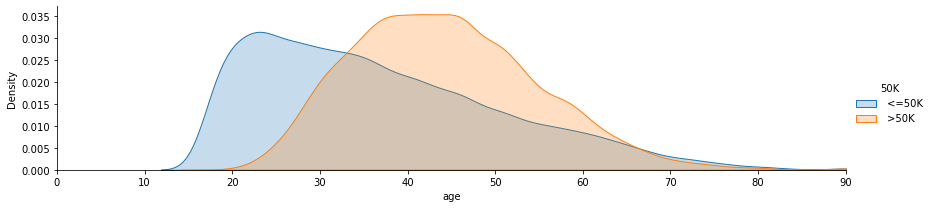

In [12]:
# Understanding income
facet = sns.FacetGrid(df48K, hue="50K", aspect=4)
facet.map(sns.kdeplot,'age', shade= True)
facet.set(xlim=(0, df48K['age'].max()))
facet.add_legend()


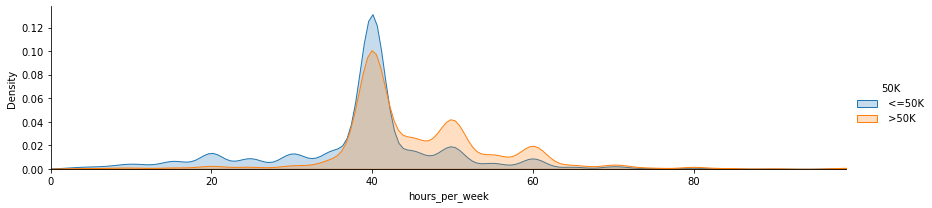

In [13]:
# Understanding working hours per week
facet = sns.FacetGrid(df48K, hue="50K", aspect=4)
facet.map(sns.kdeplot,'hours_per_week', shade= True)
facet.set(xlim=(0, df48K['hours_per_week'].max()))
facet.add_legend()


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

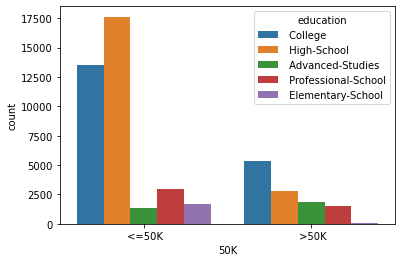

In [14]:
# Understanding education
sns.countplot('50K', hue='education', data=df48K)


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

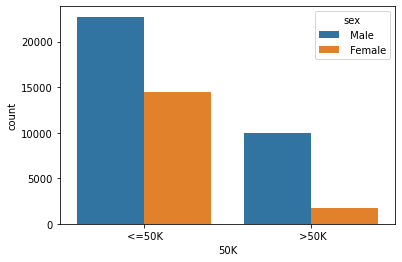

In [15]:
# Understanding gender distribution
sns.countplot('50K', hue='sex', data=df48K)


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

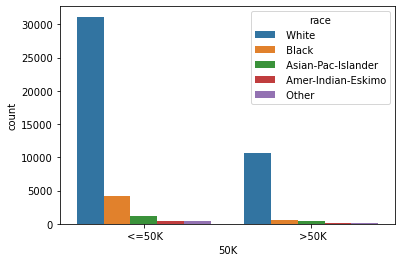

In [16]:
# Understanding race distribution
sns.countplot('50K', hue='race', data=df48K)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

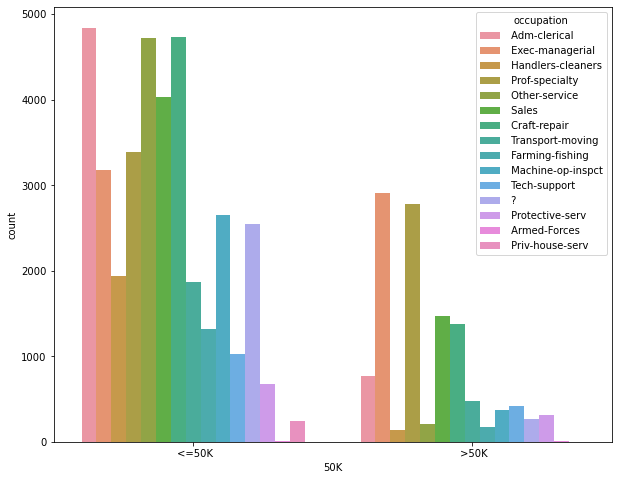

In [17]:
# Understanding occupations distribution
plt.figure(figsize=(10,8))
sns.countplot('50K', hue='occupation', data=df48K)


In [18]:
df48K['occupation'] = df48K['occupation'].replace({r'\?', 'Other-service'}, 'Other-service', regex=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

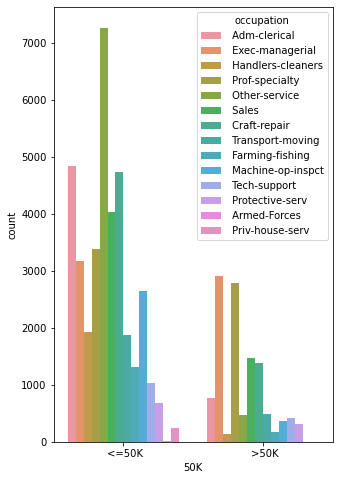

In [19]:
plt.figure(figsize=(5,8))
sns.countplot('50K', hue='occupation', data=df48K)


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

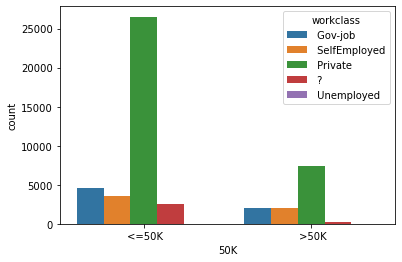

In [20]:
# Understanding work class distribution
sns.countplot('50K', hue='workclass', data=df48K)


In [21]:
df48K['workclass'] = df48K['workclass'].replace({r'\?', 'Private'}, 'Private', regex=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

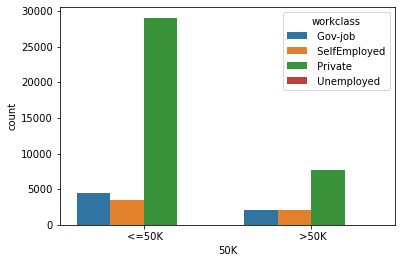

In [23]:
sns.countplot('50K', hue='workclass', data=df48K) 


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='50K', ylabel='count'>

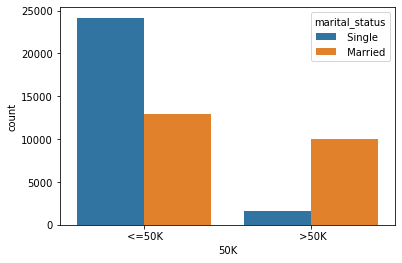

In [24]:
# Understanding marital_status distribution
sns.countplot('50K', hue='marital_status', data=df48K)


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

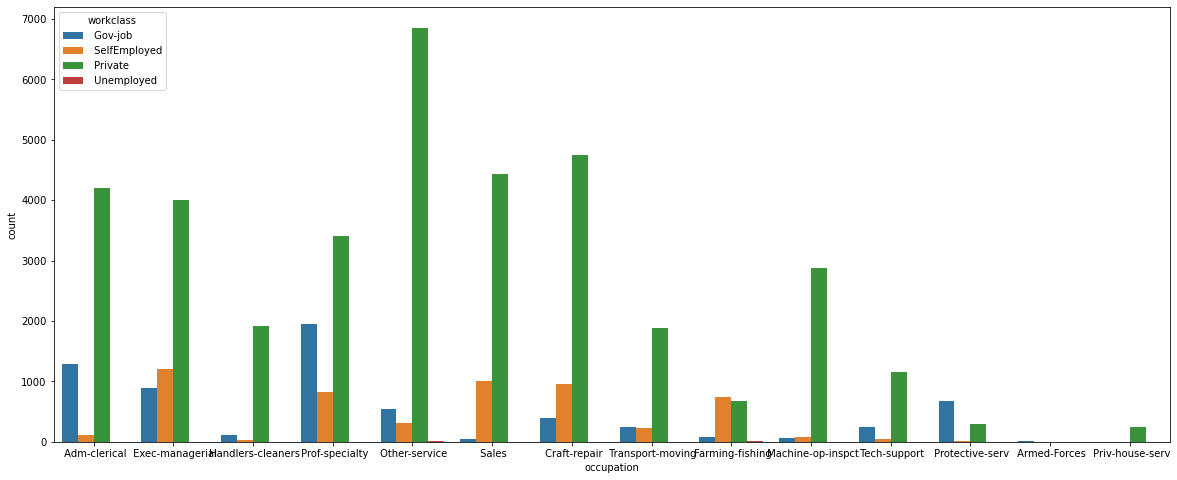

In [25]:
# Understanding occupation & workclass
plt.figure(figsize=(20,8))
sns.countplot('occupation', hue='workclass', data=df48K)


# data modelling

In [38]:
# preparing the data for spliting into train, validation and test with train_test_split
y = df48K[['50K']]  #pt arrray .values
X = df48K.drop(['50K'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=9)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=9)


In [40]:
# Feature selection using normalization and standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [41]:
# First model: knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train_scaled, y_train)


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28)

In [42]:
# Model Evaluation and metrics:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(knn.score(X_train_scaled, y_train))
y_pred = knn.predict(X_train_scaled)
print(confusion_matrix(y_pred, y_train))  
print(classification_report(y_pred, y_train, target_names=[">50K", "<50K"])) 

0.8449965116631784
[[23551  3496]
 [ 1614  4306]]
              precision    recall  f1-score   support

        >50K       0.94      0.87      0.90     27047
        <50K       0.55      0.73      0.63      5920

    accuracy                           0.84     32967
   macro avg       0.74      0.80      0.76     32967
weighted avg       0.87      0.84      0.85     32967



In [43]:

print(knn.score(X_val_scaled, y_val))
y_pred = knn.predict(X_val_scaled)
print(confusion_matrix(y_pred, y_val)) 
print(classification_report(y_pred, y_val, target_names=[">50K", "<50K"]))

0.8255686988171065
[[7683 1326]
 [ 591 1390]]
              precision    recall  f1-score   support

        >50K       0.93      0.85      0.89      9009
        <50K       0.51      0.70      0.59      1981

    accuracy                           0.83     10990
   macro avg       0.72      0.78      0.74     10990
weighted avg       0.85      0.83      0.84     10990



In [44]:
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=[">50K", "<50K"]))

[[3463  557]
 [ 253  612]]
              precision    recall  f1-score   support

        >50K       0.93      0.86      0.90      4020
        <50K       0.52      0.71      0.60       865

    accuracy                           0.83      4885
   macro avg       0.73      0.78      0.75      4885
weighted avg       0.86      0.83      0.84      4885



In [45]:
# Model 2: LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print(logreg.score(X_train_scaled, y_train))
y_pred = logreg.predict(X_train_scaled)
print(confusion_matrix(y_pred, y_train)) 
print(classification_report(y_pred, y_train))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8516091849425182
[[23374  3101]
 [ 1791  4701]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     26475
           1       0.60      0.72      0.66      6492

    accuracy                           0.85     32967
   macro avg       0.77      0.80      0.78     32967
weighted avg       0.86      0.85      0.86     32967



In [46]:
print(logreg.score(X_val_scaled, y_val))
y_pred = logreg.predict(X_val_scaled)
print(confusion_matrix(y_pred, y_val)) 
print(classification_report(y_pred, y_val))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.8424021838034577
[[7687 1145]
 [ 587 1571]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      8832
           1       0.58      0.73      0.64      2158

    accuracy                           0.84     10990
   macro avg       0.75      0.80      0.77     10990
weighted avg       0.86      0.84      0.85     10990

[[3441  511]
 [ 275  658]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3952
           1       0.56      0.71      0.63       933

    accuracy                           0.84      4885
   macro avg       0.74      0.79      0.76      4885
weighted avg       0.86      0.84      0.85      4885



In [47]:
# Model3: random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=9, verbose=1)
forest.fit(X_train_scaled, y_train) 
print(forest.score(X_train_scaled, y_train))
y_pred = forest.predict(X_train_scaled)
print(confusion_matrix(y_pred, y_train)) 
print(classification_report(y_pred, y_train, target_names=[">50K", "<50K"]))

C:\Users\prakh\AppData\Local\Temp\ipykernel_11376\3993686111.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, y_train) # if you don`t like the overfit feel free to use max_features and max_depth, you might even get a slightly higher f1 ;)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9798889798889799
[[24906   404]
 [  259  7398]]
              precision    recall  f1-score   support

        >50K       0.99      0.98      0.99     25310
        <50K       0.95      0.97      0.96      7657

    accuracy                           0.98     32967
   macro avg       0.97      0.98      0.97     32967
weighted avg       0.98      0.98      0.98     32967



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.9s finished


In [48]:
# on unseen data
print(forest.score(X_val_scaled, y_val))
y_pred = forest.predict(X_val_scaled)
print(confusion_matrix(y_pred, y_val)) 
print(classification_report(y_pred, y_val))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8399454049135577
[[7610 1095]
 [ 664 1621]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      8705
           1       0.60      0.71      0.65      2285

    accuracy                           0.84     10990
   macro avg       0.76      0.79      0.77     10990
weighted avg       0.85      0.84      0.84     10990



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished


In [49]:
y_pred = forest.predict(X_test_scaled)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=[">50K", "<50K"]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[3431  493]
 [ 285  676]]
              precision    recall  f1-score   support

        >50K       0.92      0.87      0.90      3924
        <50K       0.58      0.70      0.63       961

    accuracy                           0.84      4885
   macro avg       0.75      0.79      0.77      4885
weighted avg       0.86      0.84      0.85      4885



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


In [35]:
# Let's have a look at the scores on X_val:
# knn: 0.8372
# logreg: 0.8509
# randomforest: 0.8467

#.. as well at f1-scores for X_test:
# knn: 0.59           TP: 614
# logreg: 0.63        TP: 668
# randomforest: 0.63  TP: 687 

# Conclusion: if I want high score on X_val I`ll go with logreg or..
# (f1 being same) if looking for as many true positives as possible (without modifying the recall) will go with random forest... 